In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [37]:
import shutil
from pathlib import Path
# p = Path('../datasets/CelebA/img_align_celeba.zip')
# shutil.unpack_archive(p, p.parent / 'Img')

<class 'numpy.ndarray'>
[[[ 77  89  43]
  [ 59  71  25]
  [ 47  59  13]
  ...
  [ 45  62  69]
  [ 43  43  51]
  [ 40  40  48]]

 [[ 87  96  51]
  [ 69  81  35]
  [ 56  68  22]
  ...
  [ 47  62  69]
  [ 43  43  51]
  [ 40  40  48]]

 [[102 111  64]
  [ 90  99  52]
  [ 76  85  40]
  ...
  [ 45  59  68]
  [ 42  43  48]
  [ 39  40  45]]

 ...

 [[ 28  29  34]
  [ 23  27  30]
  [ 30  36  36]
  ...
  [ 15  16  18]
  [ 14  14  14]
  [ 14  14  14]]

 [[ 26  27  32]
  [ 23  27  30]
  [ 36  42  42]
  ...
  [ 13  17  18]
  [ 17  17  17]
  [ 17  17  17]]

 [[ 41  42  47]
  [ 29  33  36]
  [ 25  31  31]
  ...
  [ 13  17  18]
  [ 17  17  17]
  [ 17  17  17]]]
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)


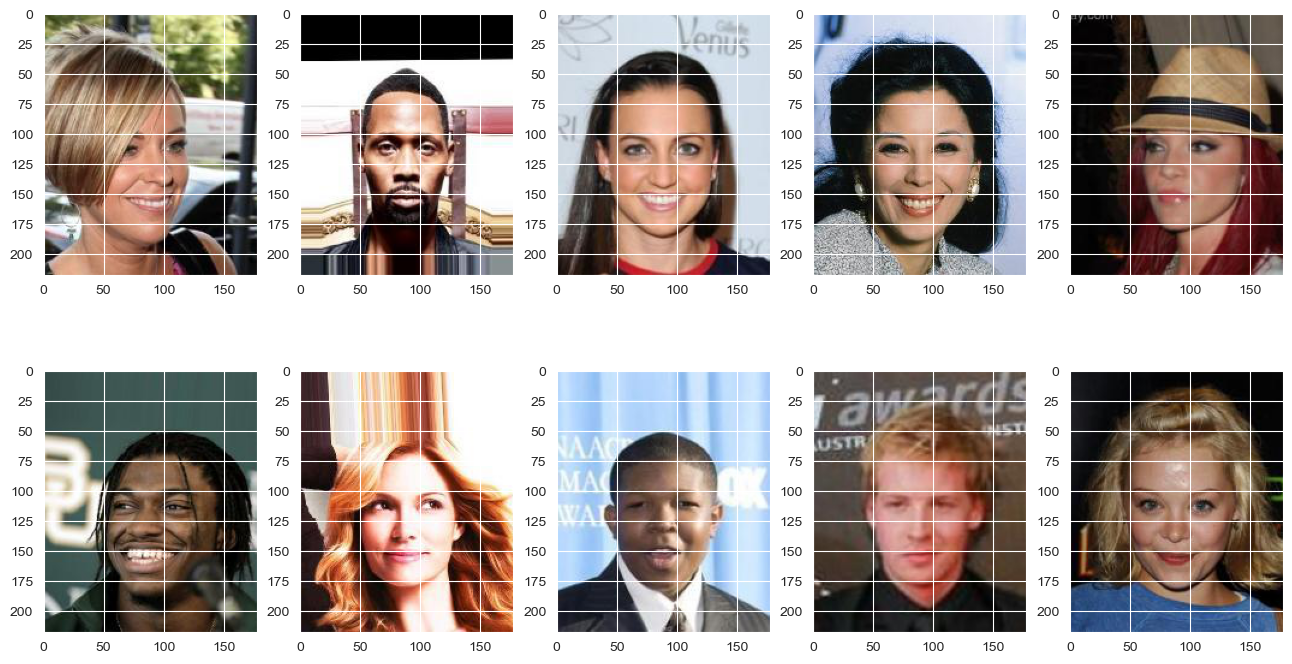

In [38]:
img_dir = Path('../datasets/CelebA/Img/img_align_celeba')
fig = plt.figure(figsize=(16, 8.5))

for i, img in enumerate(img_dir.iterdir()):
    if i >= 10:
        break
    ax = fig.add_subplot(2, 5, i + 1)
    # ax.set_xticks([]); ax.set_yticks([])
    img = plt.imread(str(img))
    if i == 0:
        print(type(img))
        print(img)
    print(img.shape)
    ax.imshow(img)

In [39]:
celeba_dir = Path('../datasets/CelebA')
label_path = celeba_dir / 'Anno/identity_CelebA.txt'
df = pd.read_csv(label_path, sep='\s+', names=['filename', 'label'])
df

,filename,label
0,000001.jpg,2880
1,000002.jpg,2937
2,000003.jpg,8692
3,000004.jpg,5805
4,000005.jpg,9295
...,...,...
202594,202595.jpg,9761
202595,202596.jpg,7192
202596,202597.jpg,9852
202597,202598.jpg,5570


In [40]:
df.shape

(202599, 2)

In [41]:
df.columns

Index(['filename', 'label'], dtype='object')

In [42]:
df['label'].value_counts()

label
3227    35
2820    35
3782    35
3745    34
3699    34
        ..
8815     1
9770     1
2264     1
9075     1
3481     1
Name: count, Length: 10177, dtype: int64

In [43]:
celeba_dir = Path('../datasets/CelebA')
label_txt = celeba_dir / "Anno/list_attr_celeba.txt"
attr_df = pd.read_csv(str(label_txt), sep='\s+', skiprows=1)
attr_df

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,-1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [44]:
attr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202599 entries, 000001.jpg to 202599.jpg
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   5_o_Clock_Shadow     202599 non-null  int64
 1   Arched_Eyebrows      202599 non-null  int64
 2   Attractive           202599 non-null  int64
 3   Bags_Under_Eyes      202599 non-null  int64
 4   Bald                 202599 non-null  int64
 5   Bangs                202599 non-null  int64
 6   Big_Lips             202599 non-null  int64
 7   Big_Nose             202599 non-null  int64
 8   Black_Hair           202599 non-null  int64
 9   Blond_Hair           202599 non-null  int64
 10  Blurry               202599 non-null  int64
 11  Brown_Hair           202599 non-null  int64
 12  Bushy_Eyebrows       202599 non-null  int64
 13  Chubby               202599 non-null  int64
 14  Double_Chin          202599 non-null  int64
 15  Eyeglasses           202599 non-null  int64

In [45]:
# 加载图片
img_dir = celeba_dir / 'Img/img_align_celeba'


def load_and_process(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)  #此处的image取值[0, 255)
    return image, label


# ds_files_labels = tf.data.Dataset.from_tensor_slices((attr_df.index, attr_df.Male))
# ds_images_labels = ds_files_labels.map(load_and_process)

# 划分训练集、验证集、测试集
partition_txt = celeba_dir / 'Eval/list_eval_partition.txt'
partition_df = pd.read_csv(partition_txt, sep='\s+', names=['img_name', 'sign'])
train_idx = partition_df.loc[partition_df.sign == 0, 'img_name']
valid_idx = partition_df.loc[partition_df.sign == 1, 'img_name']
test_idx = partition_df.loc[partition_df.sign == 2, 'img_name']


def split_dataset(idx):
    """idx就是图片名字"""
    # 拼接图片路径
    img_paths = [str(img_dir / i) for i in idx]
    ds = tf.data.Dataset.from_tensor_slices((img_paths, attr_df.loc[idx, 'Male']))
    return ds.map(load_and_process)


celeba_train = split_dataset(train_idx)
celeba_valid = split_dataset(valid_idx)
celeba_test = split_dataset(test_idx)

In [46]:
# 此处只取部分
celeba_train = celeba_train.take(16000)
celeba_valid = celeba_valid.take(1000)

In [47]:
a = next(iter(celeba_valid))
a[0]

<tf.Tensor: shape=(218, 178, 3), dtype=uint8, numpy=
array([[[42, 40, 51],
        [43, 41, 52],
        [44, 42, 53],
        ...,
        [52, 50, 61],
        [53, 51, 62],
        [53, 51, 62]],

       [[42, 40, 51],
        [43, 41, 52],
        [44, 42, 53],
        ...,
        [52, 50, 61],
        [53, 51, 62],
        [53, 51, 62]],

       [[42, 40, 51],
        [43, 41, 52],
        [44, 42, 53],
        ...,
        [52, 50, 61],
        [53, 51, 62],
        [53, 51, 62]],

       ...,

       [[26, 25, 31],
        [26, 25, 31],
        [26, 25, 31],
        ...,
        [26, 23, 30],
        [24, 23, 29],
        [24, 23, 29]],

       [[26, 25, 31],
        [26, 25, 31],
        [26, 25, 31],
        ...,
        [24, 21, 28],
        [24, 23, 29],
        [24, 23, 29]],

       [[26, 25, 31],
        [26, 25, 31],
        [26, 25, 31],
        ...,
        [24, 21, 28],
        [24, 23, 29],
        [24, 23, 29]]], dtype=uint8)>

### Image transformation and data augmentation

In [48]:
def preprocess(image, label, size=(64, 64), mode='train'):
    if mode == 'train':
        image_cropped = tf.image.random_crop(image, (178, 178, 3))
        image_resized = tf.image.resize(image_cropped, size)
        image_flip = tf.image.random_flip_left_right(image_resized)
        return (image_flip / 255., tf.cast(label, tf.int32))

    else:
        image_cropped = tf.image.crop_to_bounding_box(image, 20, 0, 178, 178)
        image_resized = tf.image.resize(image_cropped, size)
        return (image_resized / 255., tf.cast(label, tf.int32))

# # testing:
# item = next(iter(celeba_train))
# preprocess(item[0], item[1], mode='train')

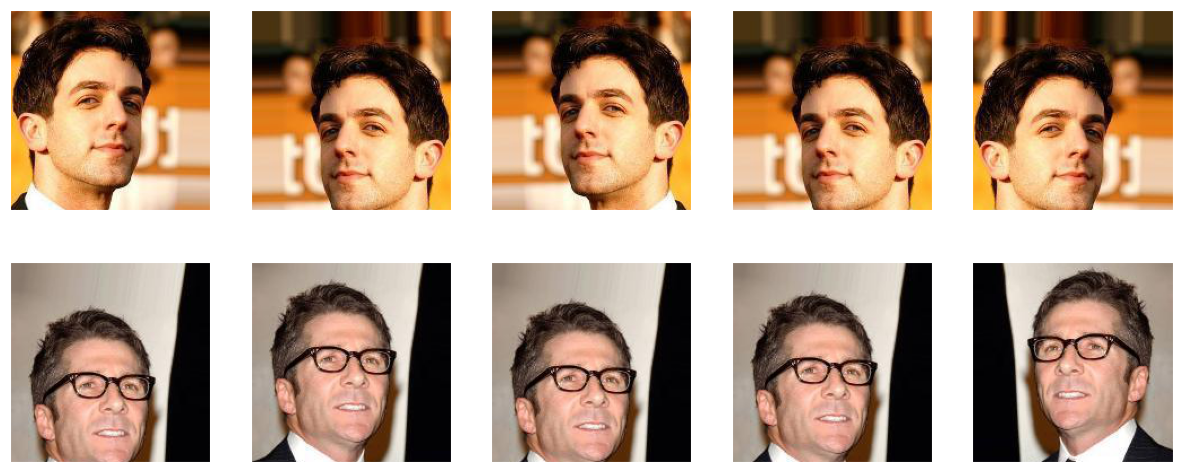

In [49]:
# 随意查看一下
tf.random.set_seed(1)

ds = celeba_train.shuffle(1000, reshuffle_each_iteration=False)
ds = ds.take(2).repeat(5)

ds = ds.map(lambda X, y: preprocess(X, y, size=(178, 178), mode='train'))

fig = plt.figure(figsize=(15, 6))
for j, example in enumerate(ds):
    ax = fig.add_subplot(2, 5, j // 2 + (j % 2) * 5 + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(example[0])

#plt.savefig('figures/15_16.png', dpi=300)
plt.show()

In [51]:
BATCH_SIZE = 32
BUFFER_SIZE = 1000
IMAGE_SIZE = (64, 64)
steps_per_epoch = np.ceil(16000 / BATCH_SIZE)
print(steps_per_epoch)

ds_train = celeba_train.map(
    lambda X, y: preprocess(X, y, size=IMAGE_SIZE, mode='train'))
ds_train = ds_train.shuffle(buffer_size=BUFFER_SIZE).repeat()
ds_train = ds_train.batch(BATCH_SIZE)

ds_valid = celeba_valid.map(
    lambda X, y: preprocess(X, y, size=IMAGE_SIZE, mode='eval'))
ds_valid = ds_valid.batch(BATCH_SIZE)

500.0


### Training a CNN gender classifier

* **Global Average Pooling**

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Conv2D(
        64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Conv2D(
        128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(
        256, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation=None)
])

tf.random.set_seed(1)

model.build(input_shape=(None, 64, 64, 3))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [53]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(ds_train, validation_data=ds_valid,
                    epochs=20, steps_per_epoch=steps_per_epoch)

Epoch 1/20
199/500 [==========>...................] - ETA: 41s - loss: -11011427.0000 - accuracy: 0.0000e+00

KeyboardInterrupt: 